In [2]:
import numpy
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', 20)

In [4]:
data=pd.read_excel("./Data/Data DS Cotton Plus.xlsx", sheet_name="BD")
data.shape

(9976, 40)

In [5]:
data.drop(["Cedula","Tipo de Contacto","Fecha Nacimiento","Mes Nacimiento","Dia Nacimiento","Direccion Valido?",
            "Telefono Movil", "TelefonoOficina", "Telefono Casa", "Mail", "Direccion"], axis = 1, inplace = True)


In [6]:
data.drop(["Mail Valido?","Tel Ofc Valid?","Tel Casa Valido?","Cel Valido?","Estado Civil"], axis=1, inplace= True)

In [7]:
data.dtypes

Nombre Completo                                                     object
Segmento                                                            object
Compro 2019?                                                        object
Compro 2020?                                                        object
Monto Comprado 2019?                                                 int64
Nro Transacciones 2019                                               int64
Monto Comprado 2020                                                  int64
Nro Transacciones 2020                                               int64
Es Contactable                                                      object
Ciudad de Residencia                                                object
Genero                                                              object
Edad                                                                 int64
Monto Total de ultima compra                                         int64
Cantidad Articulos       

In [8]:

dataobj=data.select_dtypes(include = ["object"]).copy()
dataobj.head()


,Nombre Completo,Segmento,Compro 2019?,Compro 2020?,Es Contactable,Ciudad de Residencia,Genero
0,Nombre Cliente 4866,Adictos,Si,Si,Si,BOGOTA,Mujer
1,Nombre Cliente 3636,Adictos,Si,No,Si,MEDELLIN,Mujer
2,Nombre Cliente 2941,Adictos,Si,Si,Si,MEDELLIN,Mujer
3,Nombre Cliente 4520,Adictos,Si,Si,Si,ENVIGADO,Mujer
4,Nombre Cliente 2740,Adictos,Si,Si,Si,CALI,Mujer


In [9]:
datainfo=data.select_dtypes(include =["int64"]).copy()


In [10]:
datainfo.describe().T

,count,mean,std,min,25%,50%,75%,max
Monto Comprado 2019?,9976.0,243866.951784,456434.639083,0.0,0.0,113485.0,288625.0,9231860.0
Nro Transacciones 2019,9976.0,2.462711,4.698831,0.0,0.0,1.0,3.0,92.0
Monto Comprado 2020,9976.0,25067.011628,132247.695598,0.0,0.0,0.0,0.0,6448400.0
Nro Transacciones 2020,9976.0,0.263532,1.287152,0.0,0.0,0.0,0.0,60.0
Edad,9976.0,40.361868,26.029822,10.0,25.0,31.0,44.0,111.0
Monto Total de ultima compra,9976.0,590206.416500,957754.256892,1900.0,154800.0,303700.0,652525.0,31004180.0
Cantidad Articulos,9976.0,11.969326,36.553076,1.0,1.0,4.0,10.0,2179.0
Recencia (Tiempo transcurrido en semanas desde su ultima compra),9976.0,10.423817,7.298794,0.0,4.0,12.0,14.0,48.0
Frecuencia (Cantidad items comprados),9976.0,5.775160,9.595314,1.0,1.0,3.0,6.0,301.0
Monto - MARCA COTTON- B/quilla.,9976.0,28802.528067,229728.153523,0.0,0.0,0.0,0.0,6928460.0


In [11]:
dataobj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Nombre Completo       9976 non-null   object
 1   Segmento              9976 non-null   object
 2   Compro 2019?          9976 non-null   object
 3   Compro 2020?          9976 non-null   object
 4   Es Contactable        9976 non-null   object
 5   Ciudad de Residencia  9976 non-null   object
 6   Genero                9976 non-null   object
dtypes: object(7)
memory usage: 545.7+ KB


In [12]:
dataobj["Segmento"].value_counts()


Aficionados    6845
Esporádicos    2495
Inactivo        296
Adictos         181
Curiosos        159
Name: Segmento, dtype: int64

In [13]:
def hist_boxplot(label = pd.Series):

    fig, axs = plt.subplots(2, 1, figsize = (7, 9))

    axs[0].hist(label, bins = 100)
    axs[0].set_ylabel("Cantidad")
    axs[0].axvline(label.mean(), color = "magenta", linestyle = "dashed", linewidth = 1.5)
    axs[0].axvline(label.median(), color = "cyan", linestyle = "dashed", linewidth = 1.5)

    axs[1].boxplot(label, vert = False)
    axs[1].set_xlabel(feature)

    fig.suptitle(feature)

Para encontrar los valores Atipicos en las Columnas de interes, usamos diagramas de Cajas y Bigotes la cual nos mostrara los valores que se encuntras demaciado lejos de la media.


In [14]:
list_feutures = ["Monto Comprado 2019?", "Nro Transacciones 2019", "Monto Comprado 2020", "Nro Transacciones 2020", "Edad",
"Monto Total de ultima compra","Cantidad Articulos","Recencia (Tiempo transcurrido en semanas desde su ultima compra)",
"Frecuencia (Cantidad items comprados)"]



data2=datainfo.copy()



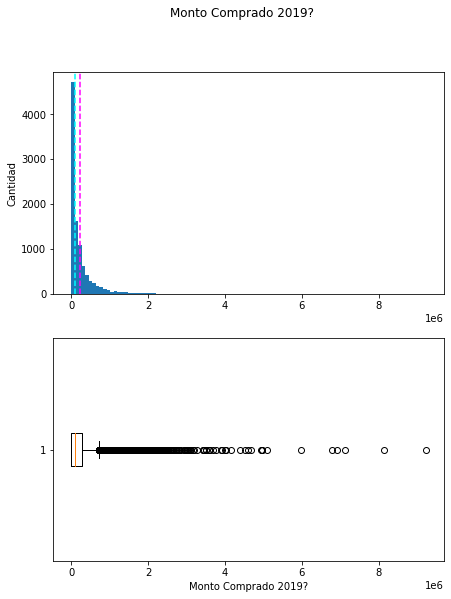

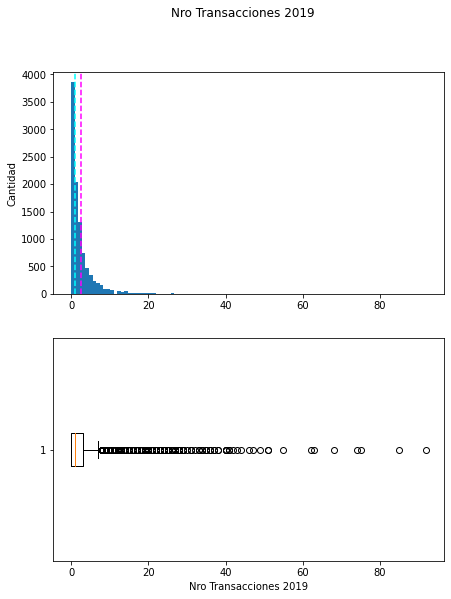

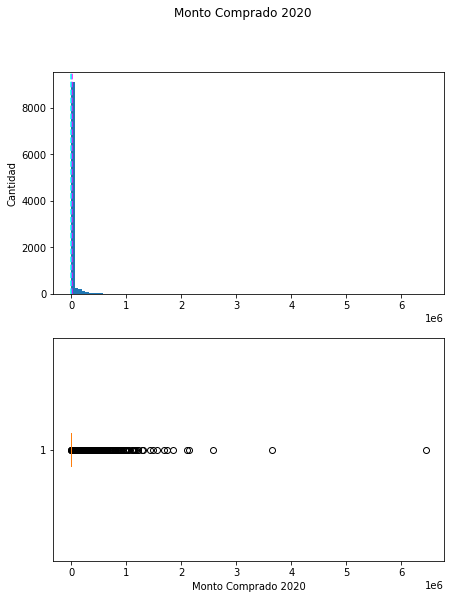

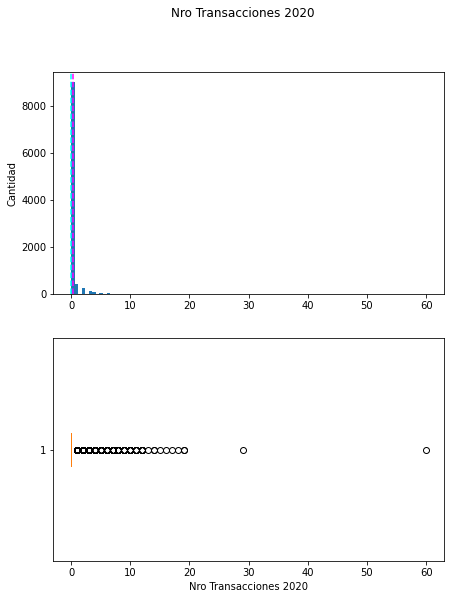

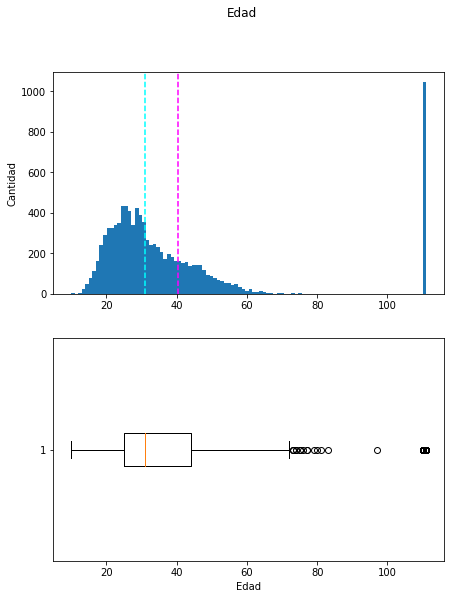

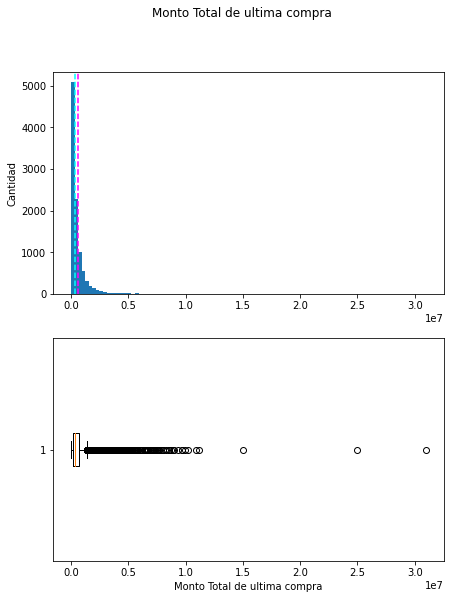

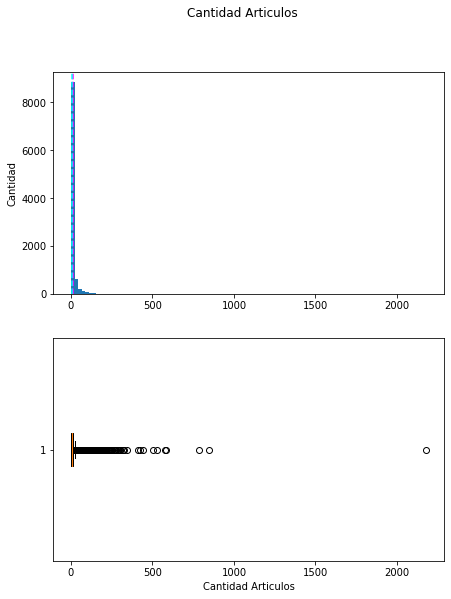

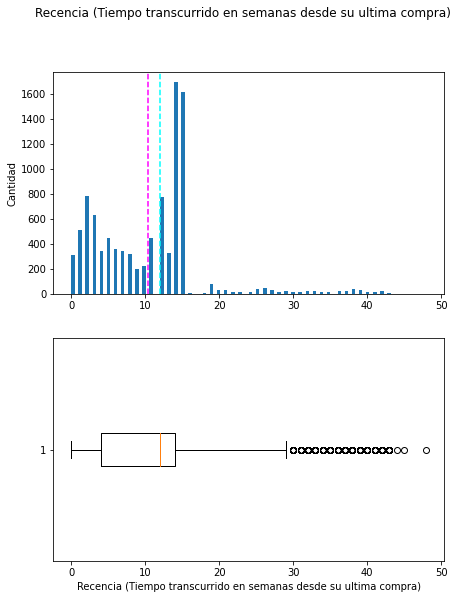

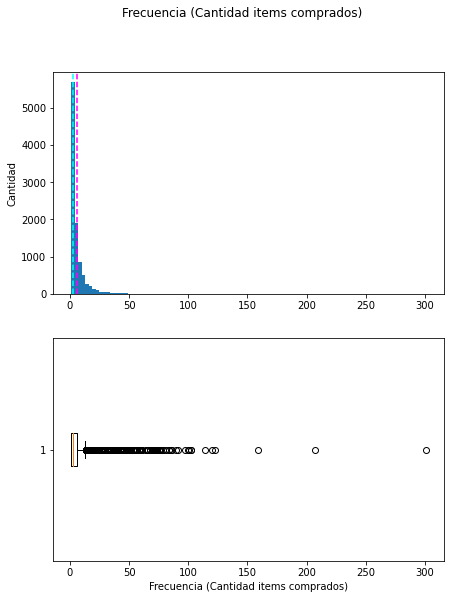

In [15]:


for feature in list_feutures:
    
    hist_boxplot(label = data2[feature])
    

Se observa por lo anterior que por lo general los usuarios solo van a mirar algunos articulos sin hacer realmente una compra, por ello la mayoria de las graficas muestra grandes picos en Cero.

Podemos tener una exepcion en cuanto a los diagramas de la edad los cuales tienen una tendencia mas distribuida, teniendo unos valores atipicos de personas con mas de 100 años las cuales seguramente fueron clientes primerizos que no eliminaron de la tabla.

Para Saber si hay campos repetidos solo debemos revisar si algun numero de identificacion esta repetido almenos 1 vez

In [16]:

data3=pd.read_excel("./Data/Data DS Cotton Plus.xlsx", sheet_name="BD")
data.shape

lista1=data3["Cedula"].value_counts()
n=0
for num in lista1:
    n=n+1
    if num>=2:
        print(lista1[n])


In [17]:
lista2=dict(lista1)
for key in lista2:
    if lista2[key] >=2:
        print(key)

Como no se imprime nada, podemos dar por echo de que no existen filas duplicadas

Ahora encontramos los valores nulos

In [18]:
data3.columns

Index(['Cedula', 'Nombre Completo', 'Segmento', 'Compro 2019?', 'Compro 2020?',
       'Monto Comprado 2019?', 'Nro Transacciones 2019', 'Monto Comprado 2020',
       'Nro Transacciones 2020', 'Tipo de Contacto', 'Es Contactable',
       'Ciudad de Residencia', 'Mail', 'Direccion', 'Genero', 'Estado Civil',
       'Fecha Nacimiento', 'Mes Nacimiento', 'Dia Nacimiento', 'Edad',
       'Monto Total de ultima compra', 'Cantidad Articulos',
       'Recencia (Tiempo transcurrido en semanas desde su ultima compra)',
       'Frecuencia (Cantidad items comprados)', 'Direccion Valido?',
       'Mail Valido?', 'Cel Valido?', 'Tel Ofc Valid?', 'Tel Casa Valido?',
       'Telefono Movil', 'TelefonoOficina', 'Telefono Casa',
       'Monto - MARCA COTTON- B/quilla.', 'Monto - Brand Store Cucuta',
       'Monto - MARCA COTTON- Bucaramanga', 'Monto - MARCA COTTON- Manizales',
       'Monto - MARCA COTTON- Pereira', 'Monto - MARCA COTTON- Cartagena',
       'Monto - MARCA COTTON- Pasto', 'Monto - MARCA

In [19]:
columnas=['Cedula', 'Nombre Completo', 'Segmento', 'Compro 2019?', 'Compro 2020?',
       'Monto Comprado 2019?', 'Nro Transacciones 2019', 'Monto Comprado 2020',
       'Nro Transacciones 2020', 'Tipo de Contacto', 'Es Contactable',
       'Ciudad de Residencia', 'Mail', 'Direccion', 'Genero', 'Estado Civil',
       'Fecha Nacimiento', 'Mes Nacimiento', 'Dia Nacimiento', 'Edad',
       'Monto Total de ultima compra', 'Cantidad Articulos',
       'Recencia (Tiempo transcurrido en semanas desde su ultima compra)',
       'Frecuencia (Cantidad items comprados)', 'Direccion Valido?',
       'Mail Valido?', 'Cel Valido?', 'Tel Ofc Valid?', 'Tel Casa Valido?',
       'Telefono Movil', 'TelefonoOficina', 'Telefono Casa',
       'Monto - MARCA COTTON- B/quilla.', 'Monto - Brand Store Cucuta',
       'Monto - MARCA COTTON- Bucaramanga', 'Monto - MARCA COTTON- Manizales',
       'Monto - MARCA COTTON- Pereira', 'Monto - MARCA COTTON- Cartagena',
       'Monto - MARCA COTTON- Pasto', 'Monto - MARCA COTTON- Cable Plaza']
colnulas = []

for col in columnas:

    if data3[col].hasnans:
       colnulas.append(col)
       print(f"", col, "tiene nulos")

colnulas

 Mail tiene nulos
 Direccion tiene nulos
 Telefono Movil tiene nulos
 TelefonoOficina tiene nulos
 Telefono Casa tiene nulos


['Mail', 'Direccion', 'Telefono Movil', 'TelefonoOficina', 'Telefono Casa']

In [20]:
for col in colnulas:
    print(col)
    print(f"contiene ", data3[col].isnull().sum(), "nulos")

    

Mail
contiene  9976 nulos
Direccion
contiene  9976 nulos
Telefono Movil
contiene  9976 nulos
TelefonoOficina
contiene  9976 nulos
Telefono Casa
contiene  9976 nulos


Por lo anterior, entendemos que solo las casillas que requieren datos personales son completamente nulas